Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 12, 12, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 128)        

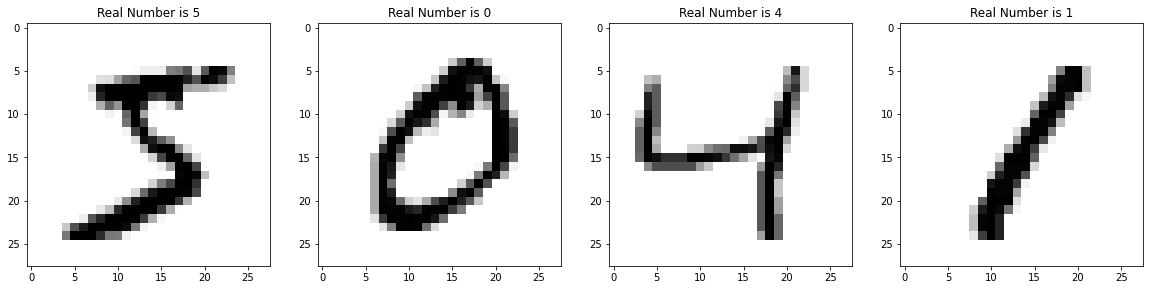

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten

from keras.layers import  BatchNormalization
from keras.callbacks import *

from matplotlib import pyplot as plt
from keras.utils.np_utils import to_categorical


####import data#######
# Load training and eval data
((train_data, train_labels),
 (eval_data, eval_labels)) = tf.keras.datasets.mnist.load_data()
train_labels = train_labels.astype(np.int32)  
eval_labels = eval_labels.astype(np.int32)

#############show the images with real number##########3
fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(train_data[i], cmap='binary')
    digit = train_labels[i]
    ax.set(title = f"Real Number is {digit}");

############## reshape train and validation data to prepare for learning model with CNN #######################
train_data=train_data.reshape(-1,28,28,1)
eval_data=eval_data.reshape(-1,28,28,1)

a = np.array(train_labels)
train_labels = tf.keras.utils.to_categorical(a-1, num_classes = 10)

b=np.array(eval_labels)
eval_labels = tf.keras.utils.to_categorical(b-1,num_classes=10)


#################### creation of a deep learning model based on the keras framework ##########################

model=Sequential()
  
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
#Dense layer that flatten the output of the CNN    
model.add(Flatten())

#Dense Layer
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))

#Add loss function, metrics, optimizer    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Adding callbacks
mc=ModelCheckpoint('best_model_handwritten.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)
#Print summary of model
model.summary()

##############Training the model with training data#####################
print('Starting....')
history=model.fit(train_data, train_labels, batch_size=128, validation_split=0.2, epochs=10,shuffle=True,callbacks=[mc])



loss:  0.03694010153412819
accuracy:  0.9915000200271606


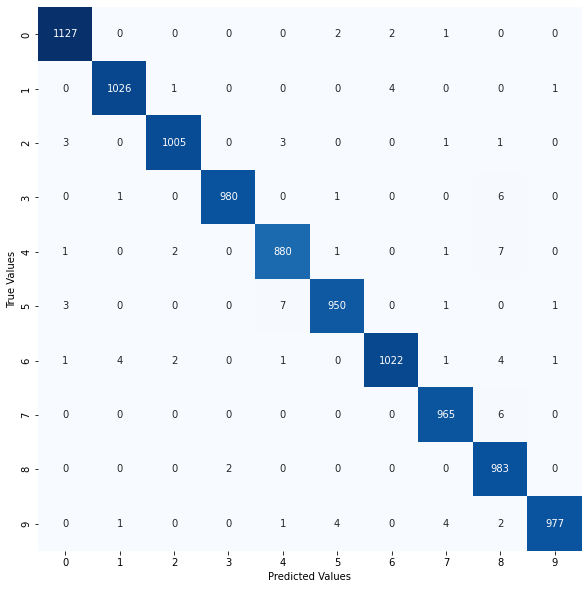

In [11]:
########################## Evaluation testing data ########################
score=model.evaluate(eval_data,eval_labels,verbose=0)
print('loss: ', score[0])
print('accuracy: ', score[1])

fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(eval_data) # Predict class probabilities 

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(eval_labels, 1) # Decode labels frome one hot foemat

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

########################## Plot confusion matrix ############################
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();


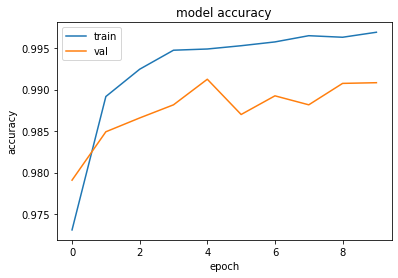

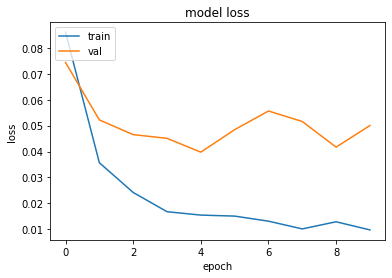

In [12]:
########################### Plot result ###############################
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#Loss result
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()